## Задание 3: Нахождение клада
### Гусев Илья, 294

In [209]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import img_as_uint, img_as_float, img_as_int
from skimage.io import imread
from skimage.color import rgb2gray, gray2rgb
from scipy.fftpack import fft2, fftshift, ifft2, ifftshift
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops
from skimage.color import label2rgb
from skimage.draw import circle
from matplotlib.patches import Rectangle
import copy

%matplotlib inline

In [210]:
# Вспомогательная функция для отображения картинок в ряд
def show(collection):
    plt.figure()
    fig, ax = plt.subplots(nrows=1, ncols=len(collection), figsize=(10, 10))
    for i in range(len(collection)):
        ax[i].imshow(collection[i])
        ax[i].axis('off')
    plt.show()

In [211]:
# Бинаризация и получение регионов
def get_regions(image):
    gray_image = rgb2gray(image)
    binarized = np.where(gray_image > 0.05, 1, 0)
    show([gray2rgb(image), gray2rgb(binarized), label2rgb(label(binarized))])
    return regionprops(label(binarized),  intensity_image=gray_image)

In [212]:
# Нахождение стартовой красной стрелки
def get_red_arrow(regions, image):
    for region in regions:
        red_arrow = False
        for i,j in region.coords:
            if image[i, j][0] > image[i, j][2] + 200 and image[i, j][0] > image[i, j][1] + 200:
                red_arrow = True
        if red_arrow:
            return region
    print("Can't find start arrow")

# Нахождение центра набора ярких пикслей на конце стрелки
def get_direction_pixel(region, image):
    all_pixels_x = []
    all_pixels_y = []
    for i,j in region.coords:
        if image[i, j][1] > image[i, j][2] + 150:
            all_pixels_x.append(i)
            all_pixels_y.append(j)
    if len(all_pixels_x) == 0:
        return None
    return sum(all_pixels_x)/len(all_pixels_x), sum(all_pixels_y)/len(all_pixels_y)

# Нахождение набравления стрелки
def get_direction_vector(region, image):
    pixel = get_direction_pixel(region, image)
    if pixel is None:
        return None
    return (pixel[0] - region.centroid[0],  pixel[1] - region.centroid[1])

# Проверка на принадлженость точки боксу
def point_in_box(point, box):
    return point[0] > box[0] and point[0] < box[2] and point[1] > box[1] and point[1] < box[3]

# Получение следующего объекта
def get_next_object(regions, region, image):
    if get_direction_pixel(region, image) is None:
        return None
    current_point = np.array(get_direction_pixel(region, image), dtype=float)
    direction = np.array(get_direction_vector(region, image))
    i = 0
    while i < 40:
        i += 1
        current_point += direction
        for next_region in regions:
            if point_in_box(current_point, next_region.bbox) and next_region != region:
                return next_region
    print("Failed to find next object")
    return None

# Обводка бокса на итоговой картинке
def fill_region(region, color):
    currentAxis = plt.gca()
    currentAxis.add_patch(Rectangle((region.bbox[1], 
                                     region.bbox[0]),
                                    region.bbox[3] - region.bbox[1],
                                    region.bbox[2] - region.bbox[0],
                                    fill=False, hatch='/', edgecolor=color))

def find_final(filename):
    plt.close()
    plt.figure()
    image = imread(filename)
    regions = get_regions(image)
    next_object = get_red_arrow(regions, image)
    current_object = next_object
    while next_object is not None:
        current_object = next_object
        fill_region(current_object, "red")
        next_object = get_next_object(regions, current_object, image)
        
    fill_region(current_object, "blue")
    plt.imshow(image)

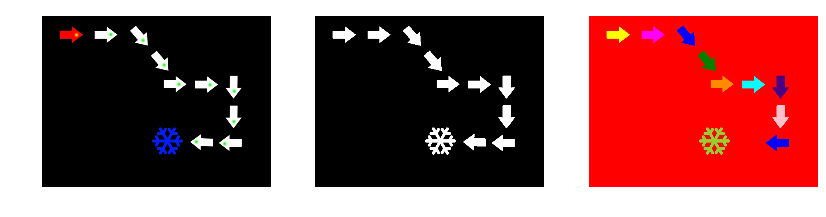

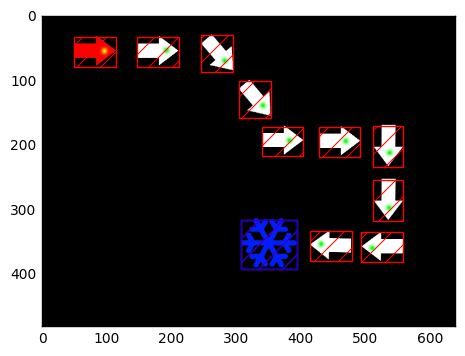

In [213]:
find_final("images/Klad00.jpg")

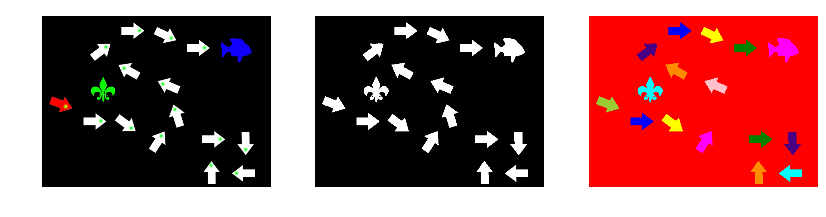

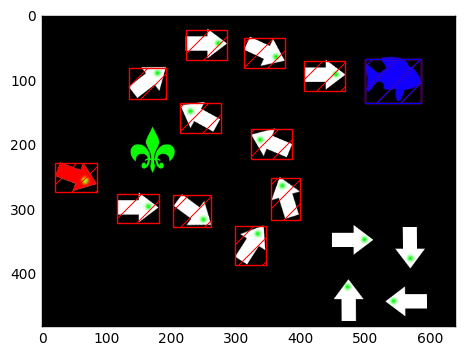

In [214]:
find_final("images/Klad01.jpg")

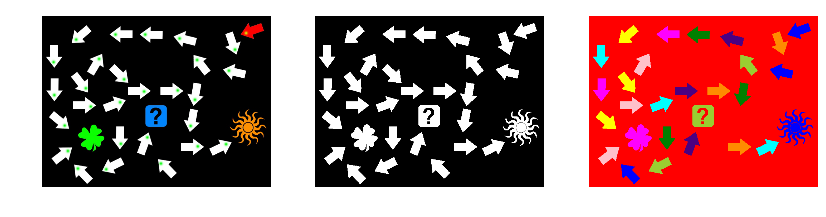

Failed to find next object


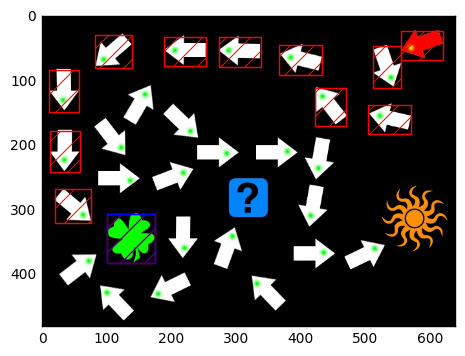

In [215]:
find_final("images/Klad02.jpg")